In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import os
import glob
import maskrcnn_benchmark

In [10]:
aps = {}
results_dir = "maskrcnn-benchmark/results/orig/evaluation/xview_val_orig"
for dirname in glob.glob(os.path.join(results_dir, '*')):
    it = int(os.path.basename(dirname))
    results = torch.load(os.path.join(dirname, "coco_results.pth"))
    aps[it] = results.results['bbox']

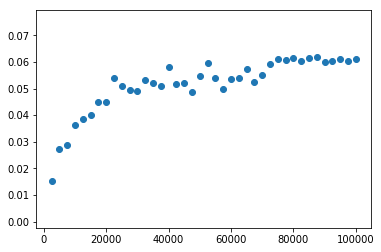

In [13]:
# plot mAP
plt.scatter(aps.keys(), [v['AP'] for k,v in aps.items()])

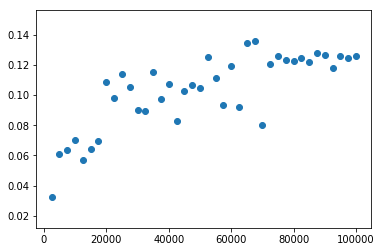

In [14]:
plt.scatter(aps.keys(), [v['APl'] for k,v in aps.items()])

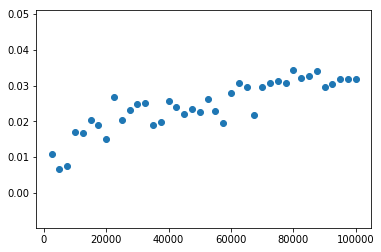

In [16]:
plt.scatter(aps.keys(), [v['APs'] for k,v in aps.items()])